<a href="https://colab.research.google.com/github/ardrkha/StockkuAI-Model/blob/main/Stokku_AI_yolov8_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stokku AI - Yolov8 Model

## Import Library

In [ ]:
!pip install onnx onnx2tf onnxruntime tflite_support protobuf

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Import Dataset

In [ ]:
rf = Roboflow(api_key="Cp1VOnp8fJRhfO9TScoE")
project = rf.workspace("myproject-ko746").project("fridgedetection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FridgeDetection-3 in yolov8:: 100%|██████████| 3490/3490 [00:00<00:00, 4152.72it/s]


## Visualize Dataset

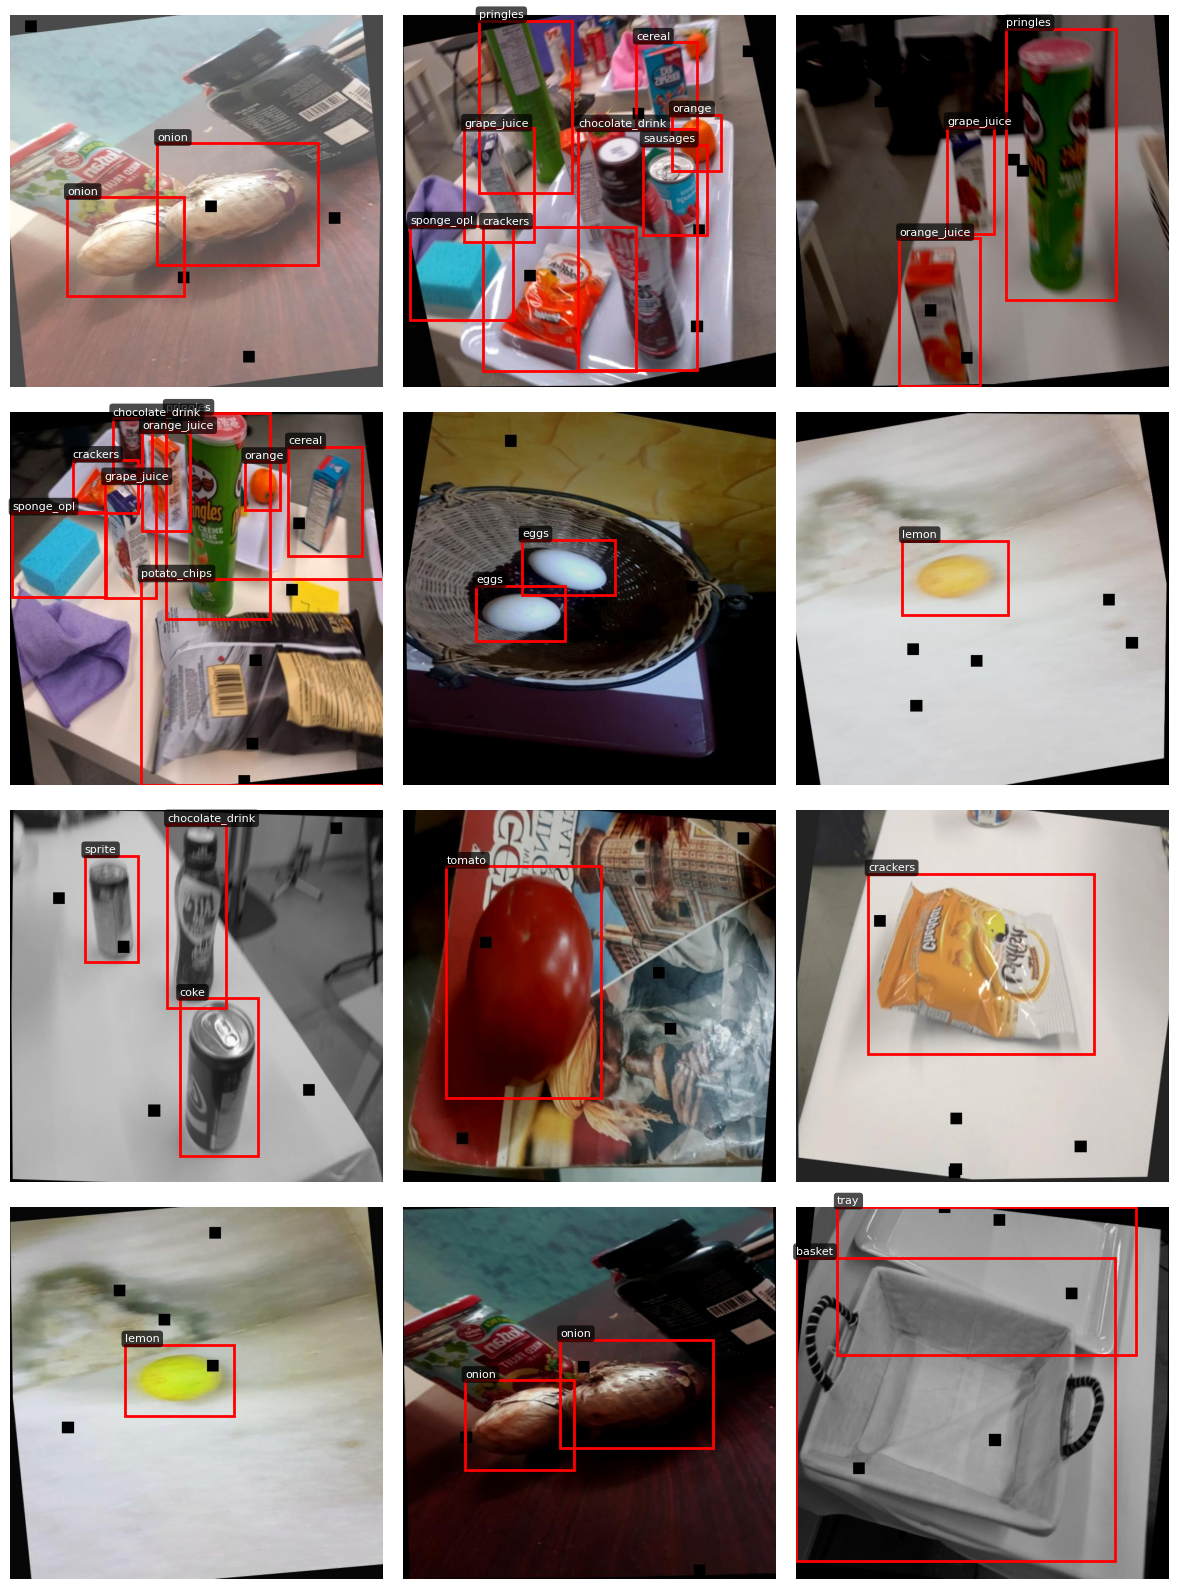

In [ ]:
# Direktori gambar dan label
image_dir = "/content/FridgeDetection-3/train/images"
label_dir = "/content/FridgeDetection-3/train/labels"

# Ambil semua gambar di folder
all_images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Pilih 12 gambar secara acak
random_images = random.sample(all_images, min(12, len(all_images)))  # Pastikan tidak error jika gambar kurang dari 12

# Daftar nama kelas (sesuaikan dengan dataset kamu)
class_names = ['apple', 'basket', 'butter', 'cereal', 'chocolate_drink', 'cloth_opl', 'coke', 'crackers', 'eggs', 'garlic', 'grape_juice', 'help_me_carry_opl', 'lemon', 'noodles', 'onion', 'orange', 'orange_juice', 'paprika', 'potato', 'potato_chips', 'pringles', 'sausages', 'scrubby', 'sponge_opl', 'sprite', 'tomato', 'tray']  # Ganti sesuai dataset

def draw_bounding_boxes(ax, image_path, label_path):
    # Baca gambar
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Dapatkan ukuran gambar
    h, w, _ = image.shape

    # Tampilkan gambar pada subplot
    ax.imshow(image)

    # Baca file label jika ada
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            values = line.strip().split()
            class_id = int(values[0])  # ID kelas
            x_center, y_center, width, height = map(float, values[1:])

            # Konversi dari skala [0,1] ke piksel gambar
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)

            # Tambahkan kotak bounding box
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            # Tambahkan label kelas di atas bounding box
            class_label = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"
            ax.text(x1, y1 - 5, class_label, fontsize=8, color='white',
                    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle="round,pad=0.3"))

    ax.axis("off")  # Hilangkan axis untuk tampilan lebih rapi

# Buat grid 3x4
fig, axes = plt.subplots(4, 3, figsize=(12, 16))  # 4 baris, 3 kolom

# Loop untuk menampilkan gambar pada grid
for ax, image_file in zip(axes.flatten(), random_images):
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace(".jpg", ".txt"))
    draw_bounding_boxes(ax, image_path, label_path)

plt.tight_layout()  # Sesuaikan tata letak agar tidak bertumpuk
plt.show()


## Training

In [ ]:
model = YOLO("yolov8n.pt")
model.train(data="/content/FridgeDetection-3/data.yaml", epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.8MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/FridgeDetection-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=27

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.0MB/s]


AMP: checks passed ✅


train: Scanning /content/FridgeDetection-3/train/labels... 1521 images, 9 backgrounds, 0 corrupt: 100%|██████████| 1521/1521 [00:00<00:00, 2328.56it/s]

train: New cache created: /content/FridgeDetection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/FridgeDetection-3/valid/labels... 145 images, 1 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 1301.39it/s]

val: New cache created: /content/FridgeDetection-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000323, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.22G      1.294      4.104      1.391          2        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        145        430        0.4      0.212      0.162     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.168      2.912       1.31          3        640: 100%|██████████| 96/96 [00:32<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]

                   all        145        430      0.596       0.52      0.543      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G      1.148      2.234      1.296         19        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        145        430      0.539      0.656      0.674      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.14G      1.135       1.91        1.3         11        640: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        145        430      0.676      0.742      0.783      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.14G      1.122      1.733      1.285          3        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


                   all        145        430      0.701      0.811      0.811       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G      1.086      1.562      1.249          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


                   all        145        430      0.711      0.849       0.86      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G      1.061      1.444       1.23          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        145        430      0.841      0.824       0.91      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      1.067      1.348      1.235          5        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        145        430      0.761      0.854      0.909      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G      1.032       1.26      1.209          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


                   all        145        430      0.792      0.879      0.912      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.14G      1.021      1.255      1.212          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


                   all        145        430      0.783      0.895      0.893      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G      1.034      1.215      1.201          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


                   all        145        430      0.813      0.904      0.923      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.16G      1.003      1.163      1.187          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]


                   all        145        430      0.833      0.921       0.92      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.15G      1.012      1.154        1.2          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]


                   all        145        430       0.81       0.91      0.916      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.15G     0.9868      1.109      1.199          3        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


                   all        145        430      0.843      0.887      0.922      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.16G     0.9621      1.049      1.175          7        640: 100%|██████████| 96/96 [00:26<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        145        430      0.859      0.892       0.93      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.17G     0.9568      1.018      1.156          8        640: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        145        430      0.856      0.917      0.927      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.17G     0.9394       1.02       1.16          2        640: 100%|██████████| 96/96 [00:24<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


                   all        145        430      0.839       0.94      0.929      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.14G      0.952      1.015      1.162         16        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


                   all        145        430      0.844      0.913      0.916      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G     0.9261     0.9628      1.143          5        640: 100%|██████████| 96/96 [00:26<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        145        430      0.825      0.948      0.926      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G     0.9316     0.9722      1.154          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        145        430       0.86      0.921      0.935      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G     0.9138     0.9269      1.141          6        640: 100%|██████████| 96/96 [00:25<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]

                   all        145        430      0.828      0.937      0.926      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.23G     0.9095      0.935      1.136          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        145        430      0.846      0.911      0.922      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G     0.8867     0.8901      1.125          4        640: 100%|██████████| 96/96 [00:25<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        145        430      0.841      0.931      0.925       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G     0.9014     0.8862      1.127          1        640: 100%|██████████| 96/96 [00:25<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]


                   all        145        430      0.864      0.922      0.922       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G     0.8768     0.8916      1.122          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]


                   all        145        430      0.854      0.911      0.924      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.14G     0.8627     0.8302      1.112          3        640: 100%|██████████| 96/96 [00:25<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]

                   all        145        430      0.874      0.925      0.927       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.16G     0.8568     0.8287       1.11          5        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        145        430      0.835      0.948      0.926      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.17G     0.8591     0.8397      1.118          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        145        430      0.879      0.911       0.94      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.14G     0.8505     0.7968      1.105          5        640: 100%|██████████| 96/96 [00:24<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        145        430      0.868      0.921      0.933      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G     0.8393     0.7885      1.094          2        640: 100%|██████████| 96/96 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        145        430      0.858      0.953      0.922      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.17G     0.8358     0.7942      1.101          5        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all        145        430      0.864      0.938      0.926      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.17G     0.8308     0.7632       1.09         12        640: 100%|██████████| 96/96 [00:25<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]

                   all        145        430      0.859      0.927      0.922      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.17G     0.8315     0.7949        1.1          2        640: 100%|██████████| 96/96 [00:26<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        145        430      0.863      0.924      0.926      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.16G     0.8109     0.7591      1.078         15        640: 100%|██████████| 96/96 [00:25<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        145        430      0.843      0.939      0.915      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G      0.818     0.7554      1.086         11        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

                   all        145        430      0.858      0.923      0.933      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.14G     0.8068     0.7363      1.074         10        640: 100%|██████████| 96/96 [00:25<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all        145        430      0.862      0.916      0.931      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.14G     0.7921     0.7277      1.075          3        640: 100%|██████████| 96/96 [00:25<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        145        430      0.877      0.922       0.93      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.16G     0.7822     0.7764      1.058          0        640: 100%|██████████| 96/96 [00:25<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        145        430      0.864      0.929      0.937      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G     0.7922     0.7102      1.071         14        640: 100%|██████████| 96/96 [00:26<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        145        430      0.862      0.935      0.933      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G     0.7908       0.72      1.067         14        640: 100%|██████████| 96/96 [00:25<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        145        430      0.872      0.929      0.938      0.603


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.17G     0.7119     0.6383      1.047          7        640: 100%|██████████| 96/96 [00:26<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        145        430      0.851      0.947      0.936      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G     0.6925     0.6093      1.026          1        640: 100%|██████████| 96/96 [00:24<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all        145        430      0.853      0.945      0.934      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G     0.6741      0.611       1.02         12        640: 100%|██████████| 96/96 [00:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


                   all        145        430      0.862      0.932      0.932      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.12G     0.6722     0.5957      1.021          2        640: 100%|██████████| 96/96 [00:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        145        430      0.856      0.935      0.933      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G     0.6594     0.5977      1.014          1        640: 100%|██████████| 96/96 [00:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        145        430       0.86       0.93      0.928      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.16G     0.6505     0.6021       1.02          1        640: 100%|██████████| 96/96 [00:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


                   all        145        430      0.854      0.924      0.932      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.16G     0.6394     0.5555     0.9986          1        640: 100%|██████████| 96/96 [00:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        145        430      0.855      0.919       0.93      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G     0.6535     0.5674      1.023          2        640: 100%|██████████| 96/96 [00:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        145        430      0.846      0.931      0.926      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.6341     0.5477      1.004         12        640: 100%|██████████| 96/96 [00:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        145        430      0.847      0.941      0.926      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.12G     0.6279      0.565      0.993          1        640: 100%|██████████| 96/96 [00:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        145        430      0.844      0.932      0.925      0.616



50 epochs completed in 0.389 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


                   all        145        430      0.862      0.933      0.932       0.66
                 apple         19         22      0.865      0.875      0.887      0.621
                basket          5          5      0.575          1      0.895      0.716
                butter         11         12      0.952      0.833      0.907      0.634
                cereal         13         13      0.742          1      0.932      0.723
       chocolate_drink         22         23      0.725      0.913      0.899      0.621
             cloth_opl          9          9      0.756       0.69      0.767      0.582
                  coke          9         10      0.892          1      0.995      0.813
              crackers         16         17      0.879      0.857      0.951       0.65
                  eggs          7         14      0.924       0.87      0.978       0.54
                garlic         10         15      0.956      0.933      0.991      0.652
           grape_juic

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3108b84a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

## Evaluation

In [ ]:
results = model.val()
print(results)


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/FridgeDetection-3/valid/labels.cache... 145 images, 1 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]


                   all        145        430      0.862      0.932      0.931      0.659
                 apple         19         22      0.865      0.874      0.887      0.625
                basket          5          5      0.576          1      0.858      0.686
                butter         11         12      0.952      0.833      0.907      0.633
                cereal         13         13      0.742          1      0.932      0.717
       chocolate_drink         22         23      0.725      0.913      0.899      0.621
             cloth_opl          9          9      0.733      0.667      0.756      0.585
                  coke          9         10      0.894          1      0.995      0.818
              crackers         16         17      0.879      0.856      0.951       0.65
                  eggs          7         14      0.924      0.873      0.978      0.539
                garlic         10         15      0.956      0.933      0.991      0.651
           grape_juic

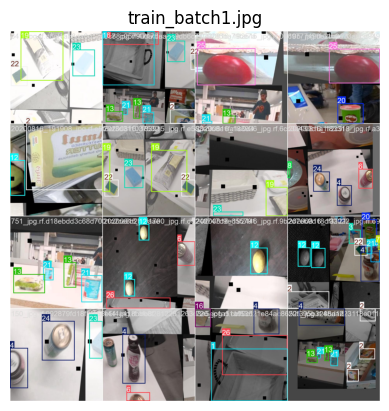

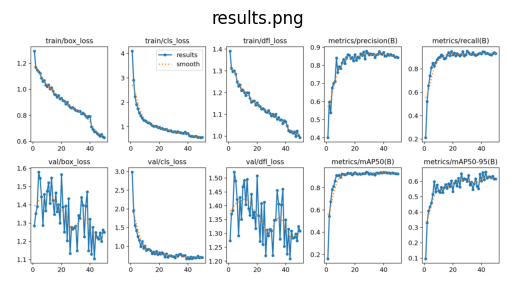

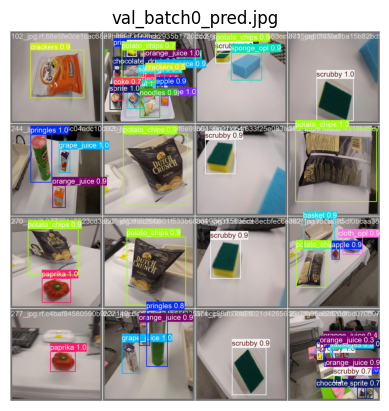

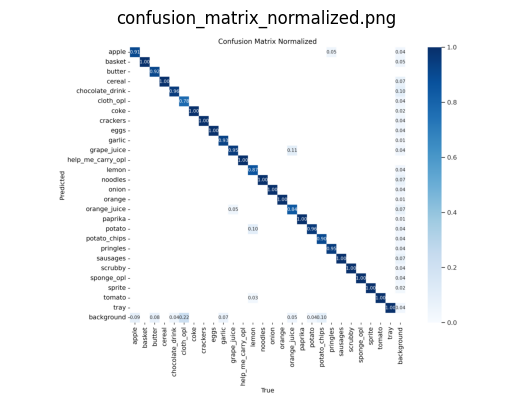

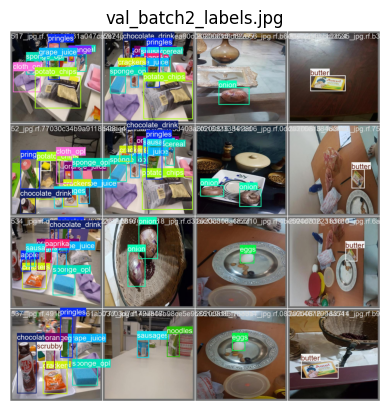

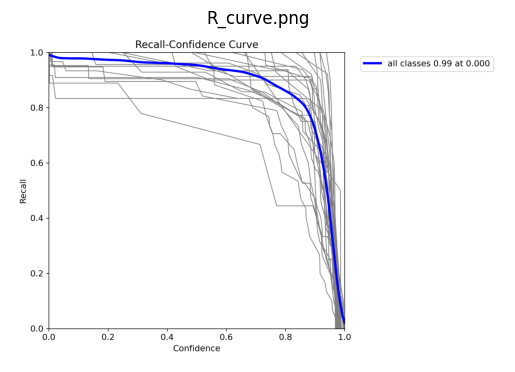

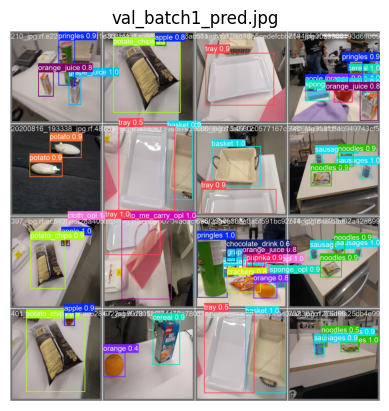

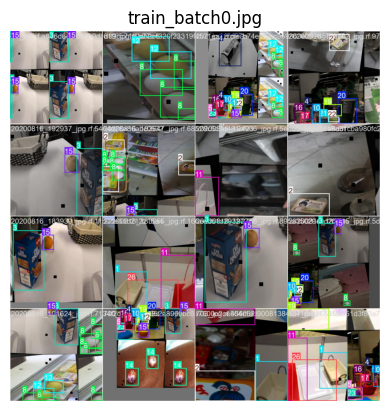

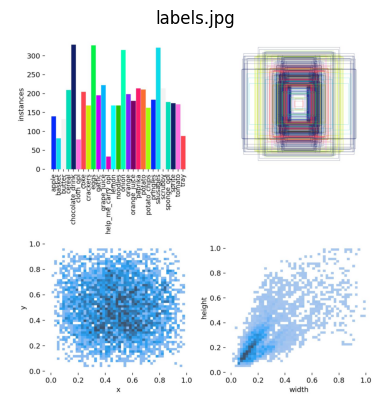

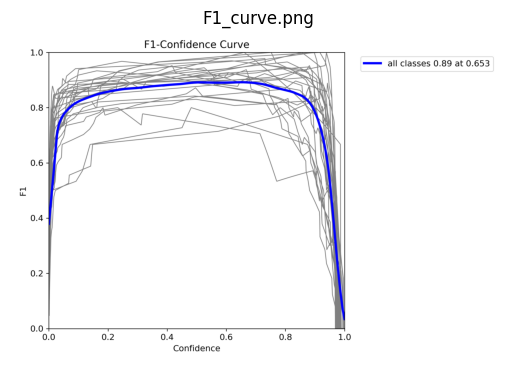

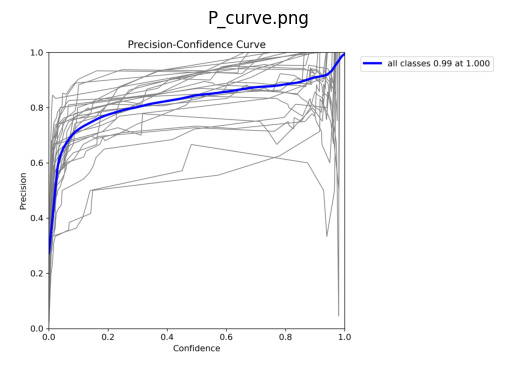

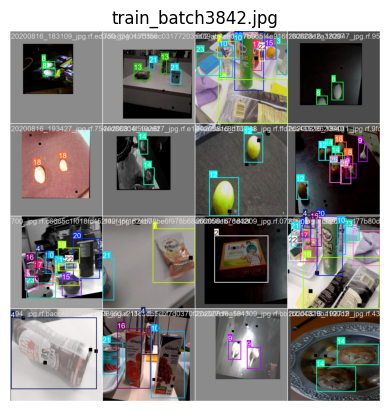

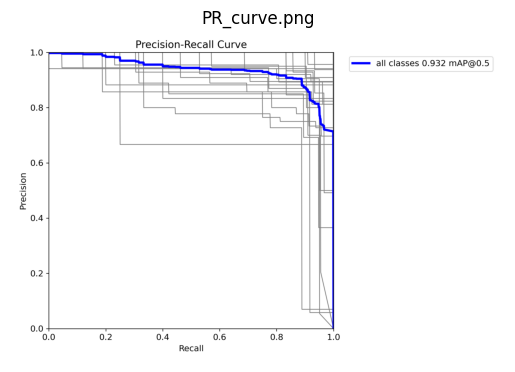

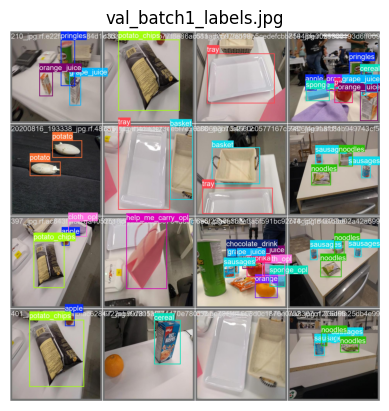

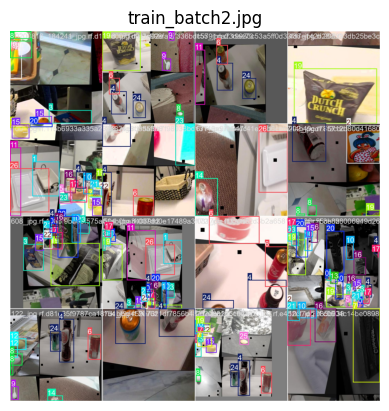

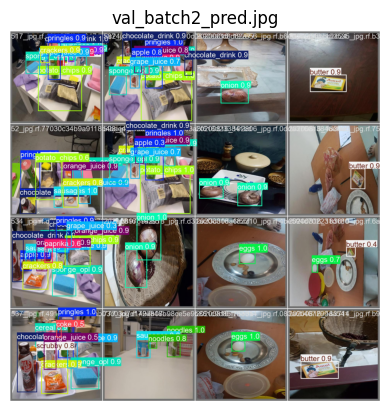

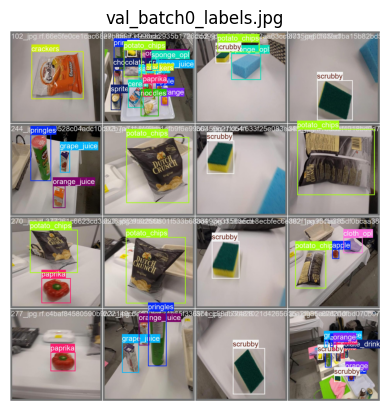

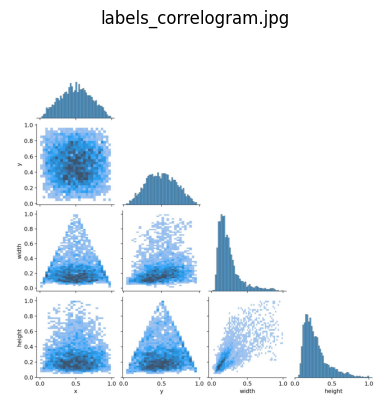

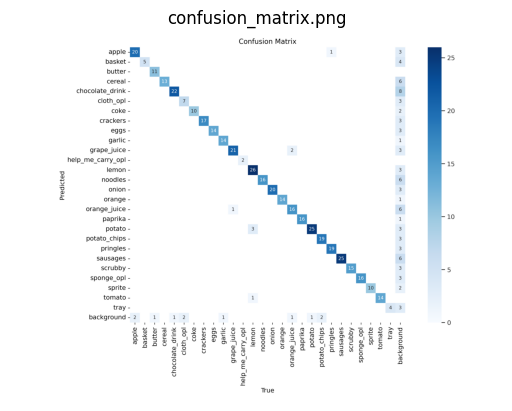

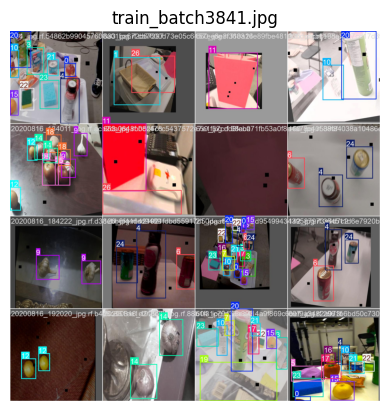

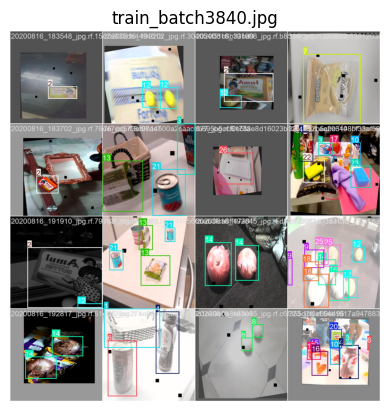

In [ ]:
# Path ke folder yang berisi grafik
folder_path = "/content/runs/detect/train"

# Dapatkan daftar semua file di folder
file_list = os.listdir(folder_path)

# Filter hanya file gambar (misalnya, .png, .jpg, .jpeg)
image_files = [f for f in file_list if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Loop melalui semua file gambar
for image_file in image_files:
    # Buat path lengkap ke file gambar
    image_path = os.path.join(folder_path, image_file)

    try:
        # Baca gambar menggunakan matplotlib
        img = mpimg.imread(image_path)

        # Tampilkan gambar
        plt.figure()
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')  # Sembunyikan axis
        plt.show()
    except Exception as e:
        print(f"Gagal menampilkan gambar {image_file}: {e}")


In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")
results = model.predict(source="/content/FridgeDetection-3/valid/images", save=True)


image 1/145 /content/FridgeDetection-3/valid/images/102_jpg.rf.66e5fe0ce1cac68e7b859731e8bdc6db.jpg: 640x640 1 crackers, 9.9ms
image 2/145 /content/FridgeDetection-3/valid/images/107_jpg.rf.6a7af958c2187e5688ff0cbe54e70d0e.jpg: 640x640 1 crackers, 7.3ms
image 3/145 /content/FridgeDetection-3/valid/images/129_jpg.rf.36564d03a0fbb9b38fb596c1424c9b0c.jpg: 640x640 1 basket, 1 chocolate_drink, 1 coke, 1 sprite, 7.3ms
image 4/145 /content/FridgeDetection-3/valid/images/130_jpg.rf.c25f62db660e22849499f936e7145b75.jpg: 640x640 1 chocolate_drink, 1 coke, 1 sprite, 7.3ms
image 5/145 /content/FridgeDetection-3/valid/images/133_jpg.rf.5f92eaa03beef7277353d25ed9d82479.jpg: 640x640 1 chocolate_drink, 1 coke, 1 sprite, 8.2ms
image 6/145 /content/FridgeDetection-3/valid/images/140_jpg.rf.b6e21e1cbbde6ba4b32cdf9493b17954.jpg: 640x640 1 chocolate_drink, 1 coke, 1 sprite, 7.3ms
image 7/145 /content/FridgeDetection-3/valid/images/147_jpg.rf.879629c6337fa3e2ac5395ee2ce47f24.jpg: 640x640 1 chocolate_drink,

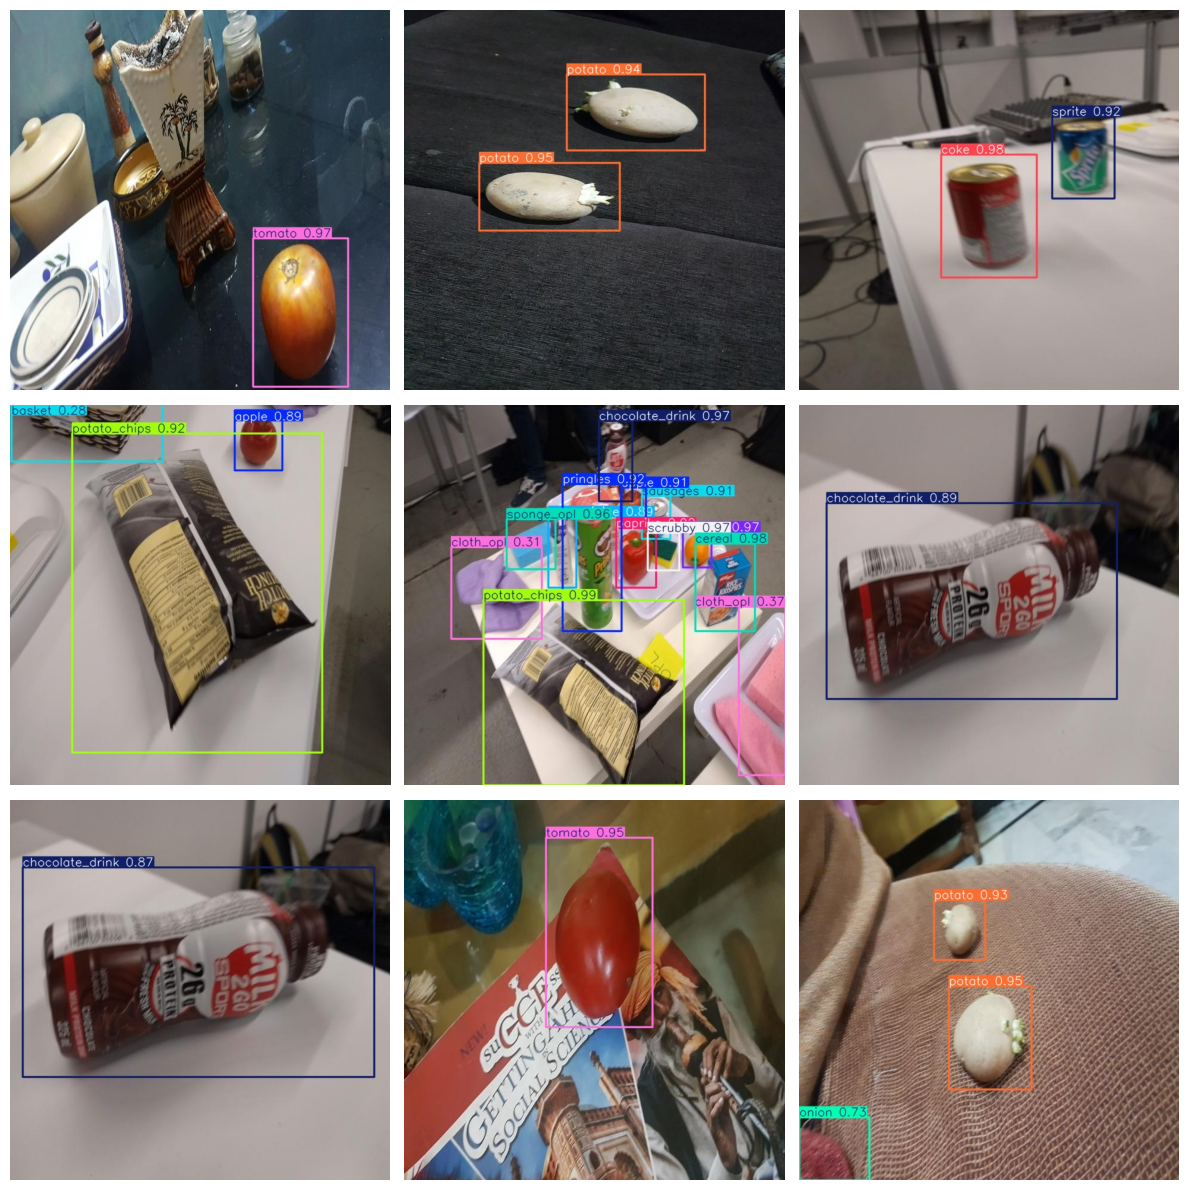

In [ ]:
# Path to the predicted images
image_dir = "/content/runs/detect/predict"

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select the first 9 images (or fewer if there are less than 9)
image_files = image_files[:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over the selected images and display them in the subplots
for i, image_file in enumerate(image_files):
    try:
        # Calculate row and column index
        row = i // 3
        col = i % 3

        # Read and display image
        image_path = os.path.join(image_dir, image_file)
        img = plt.imread(image_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
    except Exception as e:
        print(f"Error displaying image {image_file}: {e}")
        axes[row, col].axis('off')  # Hide the subplot if an error occurs


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Export Model to TFLite

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
model.export(format="tflite")

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 31, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.26.3', 'onnxslim>=0.1.31', 'onnxruntime-gpu', 'protobuf>=5'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 183.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 224.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 213.7 MB/s eta 0:00:00
   ━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 31.3MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.90file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 2.6s, saved as '/content/runs/detect/train/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success ✅ 70.8s, saved as '/content/runs/detect/train/weights/best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (72.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/content/FridgeDetection-3/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'